# Important Library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import joblib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Datasets

In [31]:
# Load the dataset

df = pd.read_csv('/content/drive/My Drive/Project 2 (TPT)/time_clean.csv')
df.head()

,Unnamed: 0,time,moduleInletTemp__ch1,moduleOutletTemp__ch1,totalInletWater__ch1,totalOutletWater__ch1,moduleInletTemp__ch2,moduleOutletTemp__ch2,totalInletWater__ch2,totalOutletWater__ch2,...,water_in_temp__ir1,water_out_temp__ir1,supp_temp__ir2,return_temp__ir2,fan_speed__ir2,unt_airflow__ir2,water_flow__ir2,water_in_temp__ir2,water_out_temp__ir2,power
0,1,2024-07-16 10:41:10,15.1,15.2,15.1,15.2,14.9,15.1,14.9,15.1,...,15.070,14.960,20.075,21.835,247.3,62.0,10.5,15.455,20.515,244.86
1,2,2024-07-16 10:41:20,15.1,15.2,15.1,15.2,14.9,15.1,14.9,15.1,...,15.070,15.015,20.020,21.835,247.2,62.0,10.3,15.510,20.515,245.08
2,3,2024-07-16 10:41:30,15.1,15.2,15.1,15.2,14.9,15.1,14.9,15.1,...,15.070,14.960,19.965,21.780,247.2,62.0,10.3,15.455,20.460,245.30
3,4,2024-07-16 10:41:40,15.2,15.3,15.2,15.3,14.9,15.1,14.9,15.1,...,15.070,15.015,19.965,21.780,223.8,56.0,10.5,15.455,20.350,200.70
4,5,2024-07-16 10:41:50,15.2,15.3,15.2,15.3,15.0,15.1,15.0,15.1,...,15.015,15.015,19.910,21.835,231.1,58.0,10.3,15.565,20.350,223.10


# Data Wrangling

In [32]:
# dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338151 entries, 0 to 338150
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             338151 non-null  int64  
 1   time                   338151 non-null  object 
 2   moduleInletTemp__ch1   338151 non-null  float64
 3   moduleOutletTemp__ch1  338151 non-null  float64
 4   totalInletWater__ch1   338151 non-null  float64
 5   totalOutletWater__ch1  338151 non-null  float64
 6   moduleInletTemp__ch2   338151 non-null  float64
 7   moduleOutletTemp__ch2  338151 non-null  float64
 8   totalInletWater__ch2   338151 non-null  float64
 9   totalOutletWater__ch2  338151 non-null  float64
 10  supp_temp__ir1         338151 non-null  float64
 11  return_temp__ir1       338151 non-null  float64
 12  fan_speed__ir1         338151 non-null  float64
 13  unt_airflow__ir1       338151 non-null  float64
 14  water_flow__ir1        338151 non-nu

In [33]:
# statistical info

df.describe()

,Unnamed: 0,moduleInletTemp__ch1,moduleOutletTemp__ch1,totalInletWater__ch1,totalOutletWater__ch1,moduleInletTemp__ch2,moduleOutletTemp__ch2,totalInletWater__ch2,totalOutletWater__ch2,supp_temp__ir1,...,water_in_temp__ir1,water_out_temp__ir1,supp_temp__ir2,return_temp__ir2,fan_speed__ir2,unt_airflow__ir2,water_flow__ir2,water_in_temp__ir2,water_out_temp__ir2,power
count,338151.000000,338151.000000,338151.000000,338151.000000,338151.000000,338151.000000,338151.000000,338151.000000,338151.000000,338151.000000,...,338151.000000,338151.000000,338151.000000,338151.000000,338151.000000,338151.000000,338151.000000,338151.000000,338151.000000,338151.000000
mean,169133.772942,16.202258,15.598329,16.202258,15.598329,15.935705,15.807541,15.935705,15.807541,19.569290,...,15.753236,15.832144,19.807840,22.357740,229.852613,57.745407,10.506279,16.081691,20.316649,225.263443
std,97616.321580,1.209454,1.520875,1.209454,1.520875,1.211237,1.812179,1.211237,1.812179,0.310602,...,1.133890,1.070200,0.416161,0.527402,16.187048,3.872803,0.891289,1.105853,0.368469,313.947571
min,1.000000,13.100000,11.300000,13.100000,11.300000,12.900000,9.800000,12.900000,9.800000,17.325000,...,12.815000,13.255000,16.225000,20.185000,0.000000,0.000000,0.000000,13.145000,16.775000,133.440000
25%,84596.500000,15.300000,14.700000,15.300000,14.700000,15.000000,14.900000,15.000000,14.900000,19.360000,...,14.905000,15.015000,19.580000,21.890000,220.600000,56.000000,10.300000,15.290000,20.130000,203.760000
50%,169134.000000,16.200000,15.900000,16.200000,15.900000,15.900000,16.000000,15.900000,16.000000,19.525000,...,15.730000,15.785000,19.910000,22.385000,230.100000,58.000000,10.500000,16.115000,20.350000,225.000000
75%,253671.500000,17.200000,16.700000,17.200000,16.700000,16.900000,17.200000,16.900000,17.200000,19.855000,...,16.665000,16.665000,20.130000,22.825000,244.800000,61.000000,10.800000,16.940000,20.570000,245.300000
max,338209.000000,19.400000,19.100000,19.400000,19.100000,19.200000,19.400000,19.200000,19.400000,20.570000,...,18.810000,18.700000,21.670000,24.200000,254.100000,63.000000,12.400000,19.800000,22.440000,49017.960000


In [34]:
df.duplicated().sum()

0

In [35]:
df = df[df['power'] <= 10000]
df = df.reset_index(drop=True)

In [36]:
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

df = df[df.iloc[:, 23] <= 4000]
df = df.drop('Unnamed: 0', axis=1)

df_resampled = df.resample('1T').mean()
df_resampled = df_resampled.dropna()

<ipython-input-36-a75eadff0595>:7: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_resampled = df.resample('1T').mean()


# Prepare for Modelling

In [37]:
X = np.zeros((df_resampled.shape[0] - 1, 12))
y = np.zeros(df_resampled.shape[0] - 1)

for i in range (df_resampled.shape[0] - 1):
    if (df_resampled.index[i+1] == df_resampled.index[i] + pd.Timedelta(minutes=1)) :
        X[i,0] = df_resampled['moduleInletTemp__ch2'].iloc[i]
        X[i,1] = df_resampled['moduleOutletTemp__ch2'].iloc[i]
        X[i,2] = df_resampled['totalInletWater__ch2'].iloc[i]
        X[i,3] = df_resampled['totalOutletWater__ch2'].iloc[i]
        X[i,4] = df_resampled['supp_temp__ir2'].iloc[i]
        X[i,5] = df_resampled['return_temp__ir2'].iloc[i]
        X[i,6] = df_resampled['fan_speed__ir2'].iloc[i]
        X[i,7] = df_resampled['unt_airflow__ir2'].iloc[i]
        X[i,8] = df_resampled['water_flow__ir2'].iloc[i]
        X[i,9] = df_resampled['water_in_temp__ir2'].iloc[i]
        X[i,10] = df_resampled['water_out_temp__ir2'].iloc[i]
        X[i,11] = df_resampled['power'].iloc[i]

        y[i] = df_resampled['return_temp__ir2'].iloc[i + 1]


non_zero_indices = ~np.all(X == 0, axis=1)
X = X[non_zero_indices]
y = y[non_zero_indices]

In [39]:
len(X)

56443

In [40]:
# split dataset into data train and data test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [41]:
# Build Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],), kernel_regularizer=l2(0.01)),
    Dense(1)
])

# Compile Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = 'mse',
    metrics=[tf.keras.metrics.MeanSquaredError()]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
# model summary

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 897 (3.50 KB)

 Trainable params: 897 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
# fit the model

history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=50,  # Increased to allow for convergence
    batch_size=64,  # Adjusted for balance between stability and speed
    verbose=1
)

Epoch 1/50
715/715 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1181.5265 - mean_squared_error: 1181.3839 - val_loss: 0.2970 - val_mean_squared_error: 0.1772
Epoch 2/50
715/715 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2921 - mean_squared_error: 0.1730 - val_loss: 0.2463 - val_mean_squared_error: 0.1289
Epoch 3/50
715/715 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2436 - mean_squared_error: 0.1269 - val_loss: 0.2523 - val_mean_squared_error: 0.1372
Epoch 4/50
715/715 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2171 - mean_squared_error: 0.1027 - val_loss: 0.1985 - val_mean_squared_error: 0.0861
Epoch 5/50
715/715 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1915 - mean_squared_error: 0.0796 - val_loss: 0.1638 - val_mean_squared_error: 0.0537
Epoch 6/50
715/715 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2060 - mean_squared_error: 0.0963 - val_loss: 0.1894 - val_mean_squared_error: 0.0808
Epoch 7/50
715/715 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1690 - mean_squared_error: 0.0611 - val_loss

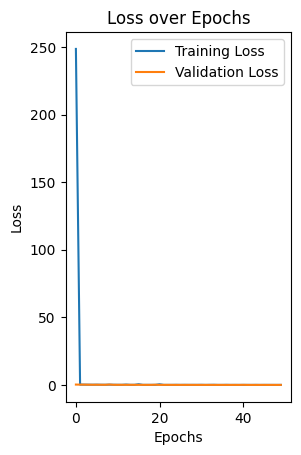

In [44]:
# plot training loss and validation loss

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Compare y_true and y_pred

In [45]:
print(len(X))
print(len(y))

56443
56443


In [ ]:
y_test_pred = model.predict(X_test)

plt.plot([x for x in range(len(y_test))], y_test, label='Actual')
plt.plot([x for x in range(len(y_test))], y_test_pred, label='Predicted')

plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Actual vs. Predicted Temperature Over Time')
plt.legend()
plt.show()

In [ ]:
joblib.dump(model, '/content/drive/My Drive/Project 2 (TPT)/model_inrow2.pkl')

['/content/drive/My Drive/Project 2 (TPT)/model_inrow2.pkl']

In [ ]:
model.save('model_inrow2.h5')